# Beispiel Analyse mit pandas und Matplotlib

In diesem Beispiel werde ich die daten des R-Sample-Dataset verwenden (daten entnommen aus https://github.com/vincentarelbundock/Rdatasets "EuroEnergy")



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Einlesen der .csv aus Verzeichnis

In [18]:
df = pd.read_csv("/home/jovyan/work/ALLBUSDEMO/test.csv")

Testausgabe des DataFrames


In [19]:
df

,rownames,gdp,energy
0,Austria,45451,30633
1,Belgium,62049,58894
2,Cyprus,2003,1211
3,Denmark,34540,27049
4,Finland,28388,26405
5,France,358675,233907
6,Greece,38039,20119
7,Iceland,1331,1124
8,Ireland,11788,11053
9,Italy,265863,192453


## Darstellung mit matplotlib

Hier werden die Datenpunkte des dataframes dargestellt

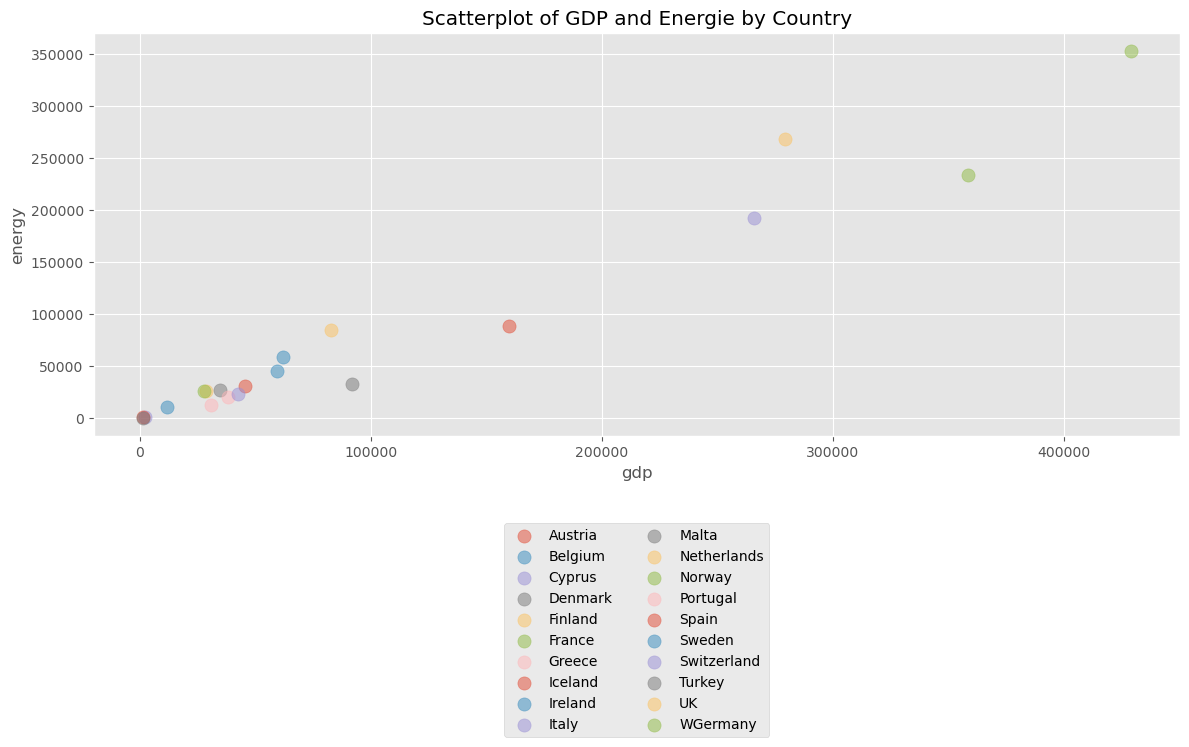

In [20]:
# Use seaborn style to make the plot nicer
plt.style.use('ggplot')

# Create an empty figure
plt.figure(figsize=(12, 8))

# Loop through each unique country and plot its data points
for country in df['rownames'].unique():
    subset = df[df['rownames'] == country]
    plt.scatter(subset['gdp'], subset['energy'], label=country, alpha=0.5, s= 90)

# Add labels and title
plt.xlabel('gdp')
plt.ylabel('energy')
plt.title('Scatterplot of GDP and Energie by Country')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Adjust the layout so everything fits
plt.tight_layout()

# Show the plot
plt.show()


## Lineare regression ausführen und graphisch darstellen


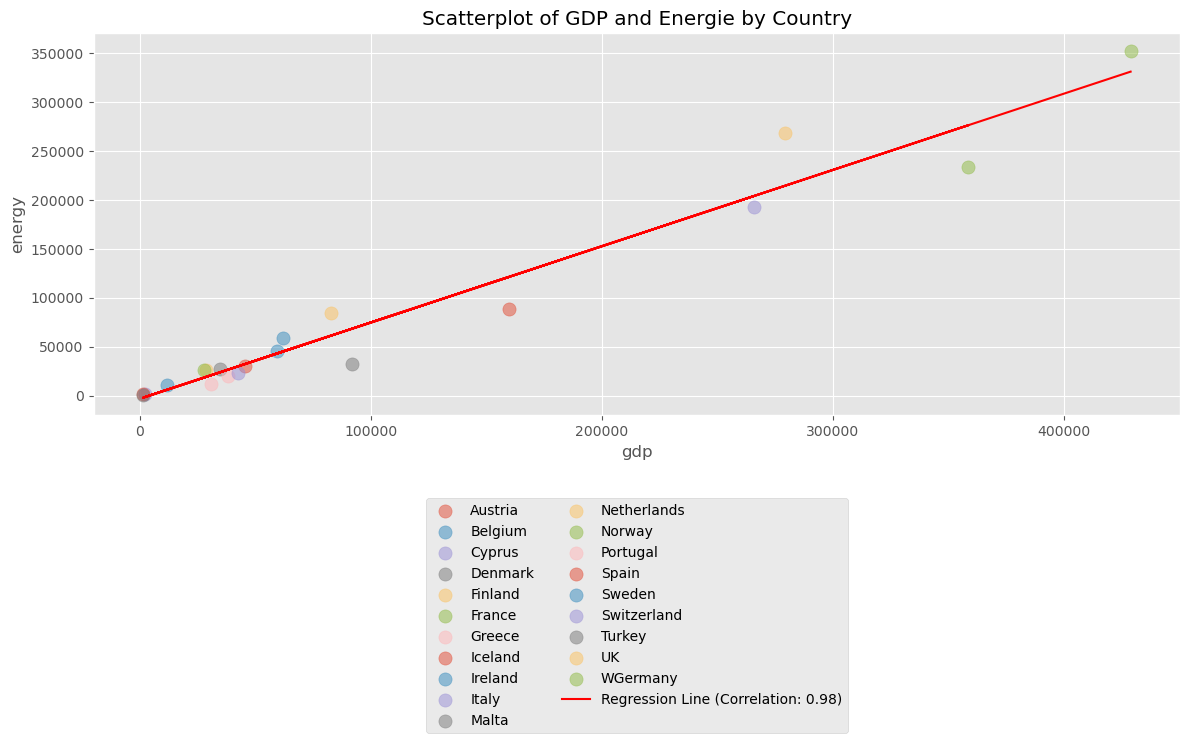

In [21]:



# Use seaborn style to make the plot nicer
plt.style.use('ggplot')

# Create an empty figure
plt.figure(figsize=(12, 8))

# Loop through each unique country and plot its data points
for country in df['rownames'].unique():
    subset = df[df['rownames'] == country]
    plt.scatter(subset['gdp'], subset['energy'], label=country, alpha=0.5, s= 90)

# Add labels and title
plt.xlabel('gdp')
plt.ylabel('energy')
plt.title('Scatterplot of GDP and Energie by Country')


# Calculate the correlation coefficient for all data points
correlation = df['gdp'].corr(df['energy'])

# Add a regression line for all data points
m, b = np.polyfit(df['gdp'], df['energy'], 1)
plt.plot(df['gdp'], m * df['gdp'] + b, color='red', 
         label=f'Regression Line (Correlation: {correlation:.2f})')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Adjust the layout so everything fits
plt.tight_layout()

# Show the plot
plt.show()


### Speichern des Diagrammes als .png 


In [22]:
plt.savefig("mein_diagram.png")

<Figure size 640x480 with 0 Axes>

# Weitere Analyse möglichkeiten

## Statistische auswertung


An dieser Stelle sollen Minimum, Maximum und Durchschnitt erhoben werden 

In [23]:
df #für Überblick anzeigen lassen

,rownames,gdp,energy
0,Austria,45451,30633
1,Belgium,62049,58894
2,Cyprus,2003,1211
3,Denmark,34540,27049
4,Finland,28388,26405
5,France,358675,233907
6,Greece,38039,20119
7,Iceland,1331,1124
8,Ireland,11788,11053
9,Italy,265863,192453


## Sortieren des DF nach höhe des energy verbrauches

In [24]:
sorted_df_by_energy = df.sort_values(by="energy", ascending=False)

In [25]:
sorted_df_by_energy

,rownames,gdp,energy
19,WGermany,428888,352677
18,UK,279191,268056
5,France,358675,233907
9,Italy,265863,192453
14,Spain,159602,88148
11,Netherlands,82804,84416
1,Belgium,62049,58894
15,Sweden,59350,45132
17,Turkey,91946,32619
0,Austria,45451,30633


## Sortieren des df nach der Höhe des GDP

In [26]:
sorted_df_by_gdp = df.sort_values(by="gdp", ascending=False)

In [27]:
sorted_df_by_gdp

,rownames,gdp,energy
19,WGermany,428888,352677
5,France,358675,233907
18,UK,279191,268056
9,Italy,265863,192453
14,Spain,159602,88148
17,Turkey,91946,32619
11,Netherlands,82804,84416
1,Belgium,62049,58894
15,Sweden,59350,45132
0,Austria,45451,30633


### Geringster Energie Verbrauch aus df

In [28]:
minimal_energy_consumption = sorted_df_by_energy.iloc[19] #da ascendenging false an dieser stelle 

In [29]:
minimal_energy_consumption

rownames    Malta
gdp          1251
energy        456
Name: 10, dtype: object

### Geringstes GDP aus df

In [30]:
minimal_gdp = sorted_df_by_gdp.iloc[19]

In [31]:
minimal_gdp

rownames    Malta
gdp          1251
energy        456
Name: 10, dtype: object

## Standart werte mit describe() abrufen

In [34]:
df.describe()

,gdp,energy
count,20.000000,20.000000
mean,102597.650000,76787.600000
std,127323.430086,101511.706947
min,1251.000000,456.000000
25%,28269.500000,18109.250000
50%,43844.500000,28841.000000
75%,108860.000000,85349.000000
max,428888.000000,352677.000000
